In [14]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
import pywt
import scipy
import os

from skimage import exposure
from skimage import io
from skimage import filters

In [17]:
def get_noise_image(image):
    ret = np.zeros(image.shape, dtype='uint8')
    ret[:,:,0] = skimage.filters.rank.median(image[:,:,0], np.ones((5,5)))
    ret[:,:,1] = skimage.filters.rank.median(image[:,:,1], np.ones((5,5)))
    ret[:,:,2] = skimage.filters.rank.median(image[:,:,2], np.ones((5,5)))

    plt.imshow(ret)
    return image.astype('float64')/255.0 - ret.astype('float64')/255.0

label: HTC-1-M7
new image: (HTC-1-M7)128.jpg


/home/peronio/Dev/anaconda3/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


label: iPhone-4s
new image: (iP4s)188.jpg
label: iPhone-6
new image: (iP6)267.jpg
label: LG-Nexus-5x
new image: (LG5x)133.jpg
label: Motorola-Droid-Maxx
new image: (MotoMax)259.jpg


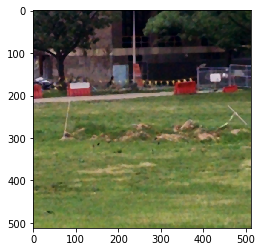

In [18]:
labels = ['HTC-1-M7','iPhone-4s', 'iPhone-6', 'LG-Nexus-5x','Motorola-Droid-Maxx','Motorola-Nexus-6','Motorola-X','Samsung-Galaxy-Note3','Samsung-Galaxy-S4','Sony-NEX-7']

feature_matrix = []

for l in labels:
    print('========================')
    print('label:',l)
    i = 0
    for image in os.listdir('train/'+l):
        i+=1
        if (i > 1):
            break
        
        print('new image:', image)
        
        image = skimage.io.imread('train/'+l+'/'+image)
        if (image.shape == (2,)):
            image = image[0]
        image = image.astype('uint8')
        
        middle_h, middle_v = image.shape[0]//2, image.shape[1]//2
        image = image[middle_h - 256:middle_h + 256, middle_v-256:middle_v+256, :]
        
        subimages = []
        plt.imshow(image)
        noise = get_noise_image(image)
        noise += (np.zeros(noise.shape) - noise.min())
        noise /= (noise.max()/255.0)
        noise = exposure.equalize_hist(noise)
        
        subimages.append(noise)

        coeffs = pywt.dwt2(noise, 'db2')

        subimages.append(coeffs[0])
        subimages.append(coeffs[1][0])
        subimages.append(coeffs[1][1])
        subimages.append(coeffs[1][2])
        
        line = []
        for im in subimages:
            for c in range(3):
                nobs, minmax, mean, variance, skewness, kurtosis = scipy.stats.describe(im[:,:,c].ravel())    
                line = line + [minmax[0],minmax[1],mean,variance,skewness,kurtosis]
        line = line + [labels.index(l)]
        feature_matrix.append(line)
    if(l == 'Motorola-Droid-Maxx'):
        break

In [4]:
np.savetxt("features.csv", feature_matrix, delimiter=",")